# Lecture 3: Logistic Regression and Text Models
***

<img src="figs/logregwordcloud.png",width=1000,height=50>

### Problem 1: Logistic Regression for 2D Continuous Features 
***

In the video lecture you saw some examples of using logistic regression to do binary classification on text data (SPAM vs HAM) and on 1D continuous data.  In this problem we'll look at logistic regression for 2D continuous data. The data we'll use are sepal measurements from the ubiquitous *iris* dataset.  


<img style="float:left; width:450px" src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg",width=300,height=50>

<img style="float:right; width:490px" src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg",width=300,height=50>


The two features of our model will be the **sepal length** and **sepal width**.  You can see the data plotted below. 

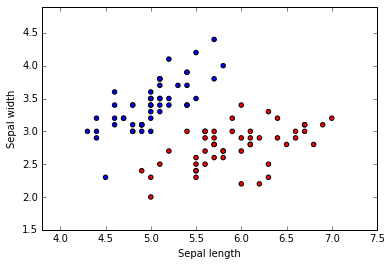

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()
X_train = iris.data[iris.target != 2, :2]  # we only take the first two features.
y_train = iris.target[iris.target != 2]

x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
colors = ["red" if yi==1 else "blue" for yi in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max);

We'll train a logistic regression model of the form 

$$
p(y = 1 ~|~ {\bf x}, {\bf w}) = \frac{1}{1 + \textrm{exp}[-(w_0 + w_1x_1 + w_2x_2)]}
$$

using **sklearn**'s logistic regression classifier as follows 

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train);

**Q**: Determine the parameters ${\bf w}$ fit by the model.  It might be helpful to consult the documentation for the classifier on the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">sklearn website</a>. 

**A**: The bias term is stored in logreg.intercept_ . The remaining coefficients are stored in logreg.coef_ . For this problem we have $w_0 =-0.599$, $w_1 = 2.217$, and $w_2 =  -3.692$. 

**Q**: In general, what does the Logistic Regression decision boundary look like for data with two features?  

**A**: The decision boundary for Logistic Regresion for data with two features is a line.  To see this, remember that the decision boundary is made up of $(x_1, x_2)$ points such that $\textrm{sigm}({\bf w}^T{\bf x}) = 0.5$.  We then have 

$$
\frac{1}{1 + \textrm{exp}[-(w_0 + w_1x_1 + w_2x_2)]} = \frac{1}{2} ~~\Rightarrow ~~ w_0 + w_1x_1 + w_2x_2 = 0 ~~\Rightarrow~~ x_2 = -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2}
$$

So the decision boundary is a line with slope $-w_1/w_2$ and intercept $-w_0/w_2$. 

**Q**: Modify the code below to plot the decision boundary along with the data. 

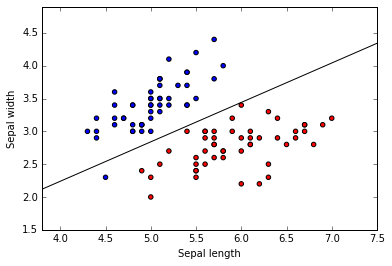

In [14]:
import numpy as np

plt.scatter(X_train[:, 0], X_train[:, 1], c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

x1 = np.linspace(x_min, x_max, 100)
w0 = logreg.intercept_
w1 = logreg.coef_[0][0]
w2 = logreg.coef_[0][1]
x2 = -(w0/w2) - (w1/w2)*x1
plt.plot(x1, x2, color="black");

### Problem 2: Topic Identification Using Bag-of-Words
***

In this exercise you will use Logistic Regression and Naive Bayes to identify topics in a corpus of news articles.  The data was taken from the Reuters-21578 dataset containing articles from Reuters' 1985 financial newswire service.  Each article has been classified into topics such as earnings, acquisitions, wheat, shipping, etc.  

We will be working with data from the earnings and aquisitions categories and trying to predict which category an article belongs to based on its text.  In the next step you will load the data set and known labels into numpy arrays and then split them into a training and test sets. We also load a vocabulary which is an array of strings indicating which word each feature belongs to.

**DATA**: Click <a href="http://grandmaster.colorado.edu/~cketelsen/files/csci5622/notebooks/lesson03/reuters_data.tar">here</a> to download the data.  Make sure you un-tar the data in the same directory as this notebook. 

In [1]:
import numpy as np

X = np.loadtxt(open("data/reuters_train.csv","rb"),delimiter=",")
y = np.loadtxt(open("data/reuters_labels.txt", "rb"))

with open("data/reuters_words.txt") as f: 
    vocabulary = np.array([line.strip() for line in f])

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In the data matrix X_train, rows correspond to documents and columns correspond to particular terms in the corpus. The value of the $(d,t)$-the entry tells you the number of times that term $t$ appears in document $d$.  The entries in y_train indicate which topic the training article belongs to.  Here we've used 0 for earnings and 1 for acquisitions.  

**Q**: Which topic class does the first training document belong to? 

**A**: Looks like it's the aquisitions category. 

In [16]:
y_train[0]

1.0

**Q**: Take a look at the first document in X_train. How many distinct terms are there in the document?  How many times does the most frequent term occur in the document?  

**A**: The commands below answer the questions

In [17]:
print "There are ", np.sum(X_train[0,:] != 0), " distinct terms in the first document"

There are  75  distinct terms in the first document


In [18]:
print "The most frequent term in the first document appears ", np.max(X_train[0,:]), " times"

The most frequent term in the first document appears  10.0  times


We can see the actual text in the individual documents by indexing into the vocabulary. 

**Q**: What terms appear in the first training document and what are their associated frequencies? 

**A**: See below

In [19]:
[(word, freq) for (word, freq) in zip(vocabulary, X_train[0]) if freq > 0]

[('dlr', 4.0),
 ('mln', 1.0),
 ('februari', 1.0),
 ('offer', 3.0),
 ('recent', 1.0),
 ('pct', 1.0),
 ('plc', 1.0),
 ('compani', 2.0),
 ('file', 2.0),
 ('bid', 2.0),
 ('immedi', 1.0),
 ('do', 1.0),
 ('corp', 2.0),
 ('withdraw', 1.0),
 ('circumst', 1.0),
 ('potenti', 1.0),
 ('group', 1.0),
 ('y', 1.0),
 ('dai', 2.0),
 ('steel', 1.0),
 ('sharehold', 1.0),
 ('share', 2.0),
 ('complet', 1.0),
 ('exercis', 1.0),
 ('bui', 1.0),
 ('certain', 1.0),
 ('control', 1.0),
 ('ohio', 2.0),
 ('connec', 1.0),
 ('busi', 3.0),
 ('provid', 1.0),
 ('inform', 1.0),
 ('requir', 1.0),
 ('cash', 1.0),
 ('rais', 2.0),
 ('request', 1.0),
 ('agre', 1.0),
 ('attempt', 1.0),
 ('previous', 1.0),
 ('seek', 1.0),
 ('court', 2.0),
 ('tender', 4.0),
 ('compet', 1.0),
 ('bidder', 1.0),
 ('order', 3.0),
 ('given', 1.0),
 ('ownership', 1.0),
 ('temporari', 1.0),
 ('grant', 1.0),
 ('permit', 1.0),
 ('option', 1.0),
 ('cyclop', 10.0),
 ('cyl', 1.0),
 ('affili', 1.0),
 ('liabil', 1.0),
 ('southern', 1.0),
 ('district', 2.0),
 

OK, so those don't really look like words, especially "compani" and "circumst".  The builders of the dataset used a process called **stemming** which reduces different variations of words to their root meanings.  For instance, the words **connection**, **connections**, **connected**, **connecting** all convey similar information.  Instead of treating them as distinct features we can use a stemmer to convert them all to a common root, like **connect**. 

OK, now we'll attempt to classify articles in the test set by training Naive Bayes and Logistic Regression classifiers on the training data. 

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clfNB = MultinomialNB()
clfNB.fit(X_train, y_train)
predictNB = clfNB.predict(X_test)

print "Naive Bayes accuracy: ", accuracy_score(y_test, predictNB)

Naive Bayes accuracy:  0.962014134276


In [21]:
clfLR = LogisticRegression()
clfLR.fit(X_train, y_train)
predictLR = clfLR.predict(X_test)

print "Logistic Regression accuracy: ", accuracy_score(y_test, predictLR)

Logistic Regression accuracy:  0.979681978799


It looks like Logistic Regression just slightly edges out Naive Bayes on this test set in terms of overall accuracy. 

### Problem 3: Topic Identification Using Term Frequency - Inverse Document Frequency 
***

The Bag-of-Words model for text classification is very popular, but let's see if we can do better.  Currently we're including every stemmed term in the corpus as features.  It turns out that in text classification there are often features that are not particularly useful predictors for the document class, either because they are too common or too uncommon.  **Stop-words** are extremely common, low-information words like "a", "the", "as", etc.  Removing these from documents is typically the first thing done in peparing data for document classification. (Note that they've already been removed from your training data). 

Other words that tend to be uninformative predictors are words that appear very very rarely.  In particular, if they do not appear frequently enough in the training data then it is difficult for a classification algorithm to weight them heavily in the classification process. 

In general, the words that tend to be useful predictors are the words that appear frequently, but not too frequently.  Consider the following frequency graph for a corpus. 

<img src="figs/feat_freq.png",width=400,height=50>

The features in column A appear too frequently to be very useful, and the features in column C appear too rarely. One first-pass method of feature selection in text classification would be to discard the words from columns A and C, and build a classifier with only features from column B.

Another common method for identifying the useful terms in a document is the Term Frequency - Inverse Document Frequency (tf-idf) method.  Here we won't throw away any terms, but we'll replace their Bag-of-Words frequency counts with tf-idf scores which we describe below. 

The tf-idf score is the product of two statistics, *term frequency* and *inverse document frequency*


$$\texttt{tfidf(d,t)} = \texttt{tf(d,t)} \times \texttt{idf(t)}$$

The term frequency $\texttt{tf(d,t)}$ is a measure of the frequency with which term $t$ appears on document $d$.  The inverse document frequency $\texttt{idf(t)}$ is a measure of how much information the word provides, that is, whether the term is common or rare across all documents.  By multiplying the two quantities together, we obtain a representation of term $t$ in document $d$ weighs how common the term is in the document with how common the word is in the entire corpus. 


There are many ways to compute the composite terms $\texttt{tf}$ and $\texttt{idf}$.  For simplicity, we'll define $\texttt{tf(d,t)}$ to be the number of times term $t$ appears in document $d$ (i.e., exactly what we have sitting in X_train). We will define the inverse document frequency as follows: 

$$
\texttt{idf(t)} = \ln ~ \frac{\textrm{total # documents}}{\textrm{1 + # documents with term }t}
$$

Note that if a term appears exactly once in every document this formula will break.  In that case you should use 

$$
\texttt{idf(t)} = \ln ~ \frac{\textrm{total # documents}}{\textrm{# documents with term }t}
$$

or equivalently, just set the idf value to zero.  

**Q**: Suppose that your entire corpus contains just three documents: 

| Term  | Frequency | | Term   | Frequency| | Term | Frequency| 
|-------|-----------|-|--------|----------|-|------|----------|
|this   | 2         | | this   | 1        | | try  | 1        |
|is     | 1         | | is     | 1        | | these| 2        |
|a      | 2         | | another| 2        | | other| 2        |
|sample | 1         | | example| 3        | | cases| 1        |

Compute $\texttt{tfidf}$($d_1$, "this"), $\texttt{tfidf}$($d_2$, "this"), $\texttt{tfidf}$($d_1$, "example") and $\texttt{tfidf}$($d_2$, "example").  **Note** that I've modified this example from the original. 

**A**: Let's compute the idf values first.  

$
\texttt{idf}("this") = \ln ~ \frac{3}{1+2} = \ln ~ \frac{3}{3} = \ln 1 = 0
$

$
\texttt{idf}("example") = \ln ~ \frac{3}{1+1} = \ln ~ \frac{3}{2} = 0.405
$

$
\texttt{tfidf}(d_1, "this") = 2 \times 0 = 0 
$

$
\texttt{tfidf}(d_2, "this") = 1 \times 0 = 0 
$

$
\texttt{tfidf}(d_1, "example") = 0 \times 0.405 = 0 
$

$
\texttt{tfidf}(d_2, "example") = 3 \times 0.405 = 1.215 
$

**Q**: Compute a vector $\texttt{idf}$ containing the inverse document frequency for each term in the training set.  

In [22]:
idf = np.log(1.0 * X_train.shape[0] / (1 + np.sum(X_train > 0, axis=0)))

**Q**: Compute the tf-idf scores for X_train and X_test.  Store them in new matrices X_train_tf and X_test_tf, respectively. 

In [23]:
X_train_tf = np.multiply(X_train, idf)
X_test_tf = np.multiply(X_test, idf)

Now let's train classifiers using Naive Bayes and Logistic Regression using the tf-idf scores as the features and see if we get a better result.  

In [24]:
clfNBTF = MultinomialNB()
clfNBTF.fit(X_train_tf, y_train)
predictNBTF = clfNBTF.predict(X_test_tf)

print "Naive Bayes accuracy with tf-idf: ", accuracy_score(y_test, predictNBTF)

Naive Bayes accuracy with tf-idf:  0.954946996466


In [25]:
clfLRTF = LogisticRegression()
clfLRTF.fit(X_train_tf, y_train)
predictLRTF = clfLRTF.predict(X_test_tf)

print "Logistic Regression accuracy tf-idf: ", accuracy_score(y_test, predictLRTF)

Logistic Regression accuracy tf-idf:  0.979681978799


Annnnnnnd it doesn't look much better (Naive Bayes is actually worse).  That's OK though!  A lot of the time tf-idf actually improves classification. 

Another form of tf-idf you can try is to normalize the term-frequency by document length.  In this case terms that occur very frequently in a long document won't get as much of a bump.  

In [26]:
X_train_n = np.multiply(X_train, (1./np.sum(X_train, axis=1))[:, np.newaxis])
X_test_n = np.multiply(X_test, (1./np.sum(X_test, axis=1))[:, np.newaxis])
X_train_ntf = np.multiply(X_train_n, idf)
X_test_ntf = np.multiply(X_test_n, idf)

In [27]:
clfNBNTF = MultinomialNB()
clfNBNTF.fit(X_train_ntf, y_train)
predictNBNTF = clfNBNTF.predict(X_test_ntf)

print "Naive Bayes accuracy with normalized tf-idf: ", accuracy_score(y_test, predictNBNTF)

Naive Bayes accuracy with normalized tf-idf:  0.969081272085


In [28]:
clfLRNTF = LogisticRegression()
clfLRNTF.fit(X_train_tf, y_train)
predictLRNTF = clfLRNTF.predict(X_test_tf)

print "Logistic Regression accuracy with normalized tf-idf: ", accuracy_score(y_test, predictLRNTF)

Logistic Regression accuracy with normalized tf-idf:  0.979681978799


OK, this one didn't change Logistic Regression at all (gave the exact same prediction as the first td-ifd model), but the Naive Bayes classifier was much improved! 

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
### Helper Functions 
***

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")